# 5. Calculate Distance between companies
This notebook uses a distance metric such as cosine similarity to calculate a distance between each pair of companies. It uses a vector space created in chapter 5, stored in the vector-space folder, as input.

## 5.0 Define which vector space should be used as input


In [1]:
import pandas as pd
from scipy import spatial

In [33]:
food_companies = ["veganjunkfoodbar", "pastaebasta_amsterdam", "mamakellyamsterdam", "watsonsfood",
"cannibaleroyale", "parkheuvel", "restaurantfred", "hugh_rotterdam", "oldscuola", "restaurantkite",
"wturbankitchen", "thestreetfoodclub", "rumclubutrecht", "lejardinutrecht", "broei.utrecht"]

furniture_companies = ["madedotcom", "vtwonen", "hemanederland", "loods5", "ikeanederland", "homify", "westwingnl", 
"karwei", "kwantum_nederland", "xenos_nl", "homedeco", "bol_com", "leenbakker", "wonenmetlef", "_connox_",
"interiorjunkiecom", "jysknl", "wehkamp", "fonqnl", "konforhome", "basiclabel.nl", "blokker",
"deensnl", "hastensbeds", "eijerkamp", "goossenswonenenslapen", "furn.nl", "stoermetaal", "roomednl", "misterdesignnl",
"dekbeddiscounter", "woonexpress", "zitmaxx", "pronto_wonen", "designbestseller", "barbecueshop.nl",
"flinders.design", "trendhopper", "debommelmeubelen", "otto_nl", "praxis_bouwmarkt", "gamma_nl",
"pietklerkx.nl", "swisssense", "montelwonen", "aupingnl", "hacowonenenslapen", "emma_matras", "hornbachnl",
"lampenlicht.nl", "profijtmeubel", "bianonl", "woonboulevardpoortvliet", "morreswonen", "hubo_nl", "beter_bed",
"hoogenboezem.meubelen", "villajipp_outlet", "vidaxl_nl", "mline_nl"]

sport_companies = ["plutosport.nl", "voetbalshopnl", "all4runningstore", "voetbaldirect",
"dakasport", "hockeydirect.nl", "tennisdirect", "intersportnl", "aktiesport.nl", "sport2000nederland",
"soccerfanshop", "jdsportsnl", "decathlonnederland", "gorillasportsnl", "perrysport.nl"]

company_names = food_companies + furniture_companies + sport_companies

## 5.1 Define similarity algorithms

### 5.1.1 Function to calculate cosine similarity between two companies

In [34]:
def cosine_similarity(company1, company2, vectorspace_dictArray):
    """Takes a dataframe which is a vectorspace. Takes all values of two companies and calculates a cosine
    similarity between these two companies"""
    cosine_similarity = 1 - spatial.distance.cosine(vectorspace_dictArray[company1], 
                                                    vectorspace_dictArray[company2])
    return cosine_similarity

In [35]:

from scipy.spatial import distance
def euclidean_distance(vectorspace, comp_1, comp_2):
    """company_1 and comp_2 should just be two lists with numbers. This should be created in the main function."""
    index_one = [value for value in vectorspace.index].index(comp_1)
    index_two = [value for value in vectorspace.index].index(comp_2)
    
    X = [ [value for value in vectorspace.iloc[index_one]], 
          [value for value in vectorspace.iloc[index_two]], 
        ]
    
    return distance.euclidean(X[0], X[1])

### 5.1.2 Function to calculate Jaccard similarity between two companies
<b>I skipped this one because:</b> This is the most simplistic metric: Collect the set of all words in both documents (tweets, sentences, ...), 𝐴 and 𝐵, and measure the fraction of words the two sets have in common:
Note: This does not take word frequency into account.

In [36]:
def create_company_words(companyname, vectorspace):
    current_index = 0
    #Create a list of all words, we can apply the index list on this.
    words = [value for value in vectorspace.columns]
    #Create a list of indexes where the company had a score of > 0.0
    index_buffer = []
    for value in vectorspace.loc[companyname]:
        if value > 0:
            index_buffer.append(current_index)
        current_index += 1
    return [words[value] for value in index_buffer]


def jaccard_sim(company1, company2, vectorspace_dictArray):
    words_comp_1 = 0
    words_comp_2 = 0
    c = 0
    
    for i in range(len(vectorspace_dictArray[company1])):
        if vectorspace_dictArray[company1][i] > 0:
            words_comp_1 += 1
        if vectorspace_dictArray[company2][i] > 0:
            words_comp_2 += 1
        if (vectorspace_dictArray[company1][i] > 0 and vectorspace_dictArray[company2][i] > 0):
            c += 1
    
    return float(c) / (words_comp_1 + words_comp_2 - c)

### 5.1.3 Function to transform vectorspace into a dict with company names as keys, list with values at each unique word

In [37]:
def create_vectorspace_dictArray(vectorspace):
    """Transforms the pandas object of a vectorspace into a dictionary where keys are company names and the 
    value one huge list with all weights."""
    vectorspace_dictArray = {}
    vectorspace_array = vectorspace.as_matrix()

    current_index = 0
    for company in [comp for comp in vectorspace.index]:
        vectorspace_dictArray[company] = [value for value in vectorspace_array[current_index]]
        current_index += 1

    return vectorspace_dictArray

## 5.2 Calculate distance per pair of companies

### 5.2.1 Loop through all possible pairs of companies to create a dictionary containing similarity scores

In [38]:
def distance_matrix_scores(vectorspace_dictArray, distance_metric):
    company_names = [value for value in vectorspace_dictArray]
    company_tfidf_values = {}
    
    
    for company1 in company_names:
        print(company1)
        one_company_values = {}
        
        for company2 in company_names:
            
            if distance_metric == 'cosine':    
                cosine_similarity_pairs = cosine_similarity(company1, company2, vectorspace_dictArray)
                one_company_values[company2] = cosine_similarity_pairs
            elif distance_metric == 'jaccard':
                jaccard_similarity_pairs = jaccard_sim(company1, company2, vectorspace_dictArray)
                one_company_values[company2] = jaccard_similarity_pairs
            elif distance_metric == 'euclidean':
                one_company_values[company2] = distance.euclidean(vectorspace_dictArray[company1], vectorspace_dictArray[company2])
            else:
                print('Error - Unknown distance metric: {}'.format(distance_metric))
                return
                
        company_tfidf_values[company1] = one_company_values
        
    return company_tfidf_values

### 5.2.2 Create a dataframe of the similarity scores and store in results folder

In [39]:
def createDataframe(similarity_values):
    """Takes the inner dict with similarity values to transform it into a pandas dataframe matrix."""
    collection = []
    for company in distance_matrix:
        collection.append([ distance_matrix[company][key] for key in distance_matrix[company] ])

    df_similarity_matrix = pd.DataFrame(collection)
    df_similarity_matrix.columns = company_names
    df_similarity_matrix['comp_name'] = company_names
    df_similarity_matrix.set_index('comp_name', inplace=True)
    return df_similarity_matrix

### 5.2.3 Main function which executes all code above to create a distance matrix and store it

In [9]:
data_input = 'combined'
distance_algorithm = 'euclidean' #cosine or jaccard
post_level = 'absolute'
user_level = 'absolute'
IDF_penalty = 'no'

if IDF_penalty == 'yes': idf = '-TFIDF'
else: idf = ''
    
vectorspace = pd.read_pickle('../data/vector_spaces/vector_{}_P{}_U{}{}.pkl'.format(data_input, post_level, user_level, idf))
vectorspace_dictArray = create_vectorspace_dictArray(vectorspace)
#Calculate all distance scores between the companies -- Takes a long time!
distance_matrix = distance_matrix_scores(vectorspace_dictArray, distance_algorithm)
#Create a dataframe from the scores
df_similarityScores = createDataframe(distance_matrix)
#Store the datafrrame in the results folder
df_similarityScores.to_pickle('../data/results/SS_{}_{}_P{}_U{}{}.pkl'.format(data_input, distance_algorithm, post_level, user_level, idf))

<ipython-input-6-91a9ebcdaaa8>:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  vectorspace_array = vectorspace.as_matrix()


veganjunkfoodbar
pastaebasta_amsterdam
mamakellyamsterdam
watsonsfood
cannibaleroyale
parkheuvel
restaurantfred
hugh_rotterdam
oldscuola
restaurantkite
wturbankitchen
thestreetfoodclub
rumclubutrecht
lejardinutrecht
broei.utrecht
madedotcom
vtwonen
hemanederland
loods5
ikeanederland
homify
westwingnl
karwei
kwantum_nederland
xenos_nl
homedeco
bol_com
leenbakker
wonenmetlef
_connox_
interiorjunkiecom
jysknl
wehkamp
fonqnl
konforhome
basiclabel.nl
blokker
deensnl
hastensbeds
eijerkamp
goossenswonenenslapen
furn.nl
stoermetaal
roomednl
misterdesignnl
dekbeddiscounter
woonexpress
zitmaxx
pronto_wonen
designbestseller
barbecueshop.nl
flinders.design
trendhopper
debommelmeubelen
otto_nl
praxis_bouwmarkt
gamma_nl
pietklerkx.nl
swisssense
montelwonen
aupingnl
hacowonenenslapen
emma_matras
hornbachnl
lampenlicht.nl
profijtmeubel
bianonl
woonboulevardpoortvliet
morreswonen
hubo_nl
beter_bed
hoogenboezem.meubelen
villajipp_outlet
vidaxl_nl
mline_nl
plutosport.nl
voetbalshopnl
all4runningstore
voe

## Extra: 5.3 Plot similarity scores as a matrix

In [29]:
data_input = 'hashtag'
distance_algorithm = 'cosine' #cosine or jaccard
post_level = 'absolute'
user_level = 'absolute'
IDF_penalty = 'no'

test_df = pd.read_pickle('../data/results/SS_{}_{}_P{}_U{}{}.pkl'.format(data_input, distance_algorithm, post_level, user_level, idf))

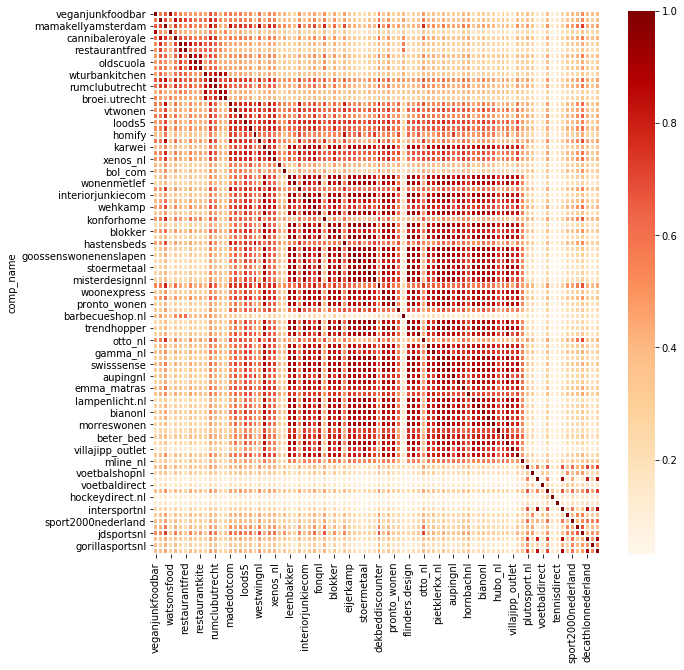

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    test_df,
    cmap='OrRd',
    linewidth=1
)
plt.show()